# Aug ??st, 2021 (play svinet)

**Motivation**: SVINET <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.svinet import *
from utils.plotting import *
from utils.render import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
alpha = 5
loc = 100.5
beta = 22
data = sp_stats.gamma.rvs(alpha, loc=loc, scale=beta, size=10000)    
print(data)

[154.47318843 214.21717873 274.35822628 ... 251.75023076 200.57670266
 229.5433265 ]

In [4]:
fit_alpha, fit_loc, fit_beta = sp_stats.gamma.fit(data)
print(fit_alpha, fit_loc, fit_beta)
print(alpha, loc, beta)

4.7699225778603935 101.96257226264568 22.700760088125048

5 100.5 22

[<matplotlib.lines.Line2D object at 0x7fe6d88db640>]

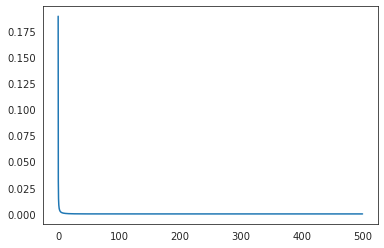

In [64]:
alpha = 0.01
beta = 20

x = np.linspace(0, 500, 10000)
y = sp_stats.gamma.pdf(x, alpha, loc=0, scale=beta)
plt.plot(x, y)

## Mice

In [2]:
mice = Mice(Config(128))
mice.combine_dfs('both', full=True)

key = 'sub-SLC07' # 'sub-SLC02_ses-2' # 'sub-SLC'
mode = 'bold'
metric = 'pearson'
match_metric = 'cosine'

In [3]:
mice.cfg.svinet_dir

'/home/hadi/Documents/workspaces/svinet'

In [5]:
ctr = 0

for x1 in sorted(os.listdir(mice.cfg.svinet_dir)):
    if f"n{mice.cfg.n_cortex_regions}" not in x1:
        continue
    _p1 = pjoin(mice.cfg.svinet_dir, x1)
    for x2 in sorted(os.listdir(_p1)):
        _p2 = pjoin(_p1, x2)
        for x3 in sorted(os.listdir(_p2)):
            _p3 = pjoin(_p2, x3)
            _, dirs, files = next(os.walk(_p3))
            if len(dirs) == 2000:
                ctr += 1
            else:
                print(x1, x2, x3, len(dirs), len(files))

bold_pearson_task-rest_sub-SLC03_n128 config p20 0 1

bold_pearson_task-rest_sub-SLC03_n128 config_clust p20 0 1

bold_pearson_task-rest_sub-SLC03_n128 real p20 0 1

bold_pearson_task-rest_sub-SLC03_ses-2_n128 config p20 0 1

bold_pearson_task-rest_sub-SLC03_ses-2_n128 config_clust p20 0 1

bold_pearson_task-rest_sub-SLC03_ses-2_n128 real p20 0 1

bold_pearson_task-rest_sub-SLC04_n128 config p20 0 1

bold_pearson_task-rest_sub-SLC04_n128 config_clust p20 0 1

bold_pearson_task-rest_sub-SLC04_n128 real p20 555 1

bold_pearson_task-rest_sub-SLC09_n128 config p20 0 1

bold_pearson_task-rest_sub-SLC09_n128 config_clust p20 0 1

bold_pearson_task-rest_sub-SLC09_n128 real p20 0 1

In [6]:
ctr / 3

40.0

In [5]:
x1

'bold_pearson_task-rest_sub-SLC_n128'

In [6]:
_p1

'/home/hadi/Documents/workspaces/svinet/bold_pearson_task-rest_sub-SLC_n128'

In [7]:
_p3

'/home/hadi/Documents/workspaces/svinet/bold_pearson_task-rest_sub-SLC_n128/real/p20'

In [8]:
files

['p20.txt']

In [4]:
_dir = '/home/hadi/Documents/workspaces/svinet_test'

In [5]:
txt_paths = []

for x1 in sorted(os.listdir(_dir)):
    if f"n{mice.cfg.n_cortex_regions}" not in x1:
        continue
    _p1 = pjoin(_dir, x1)
    for x2 in sorted(os.listdir(_p1)):
        if x2 != 'real':
            continue
        _p2 = pjoin(_p1, x2)
        for x3 in sorted(os.listdir(_p2)):
            _p3 = pjoin(_p2, x3)
            _, dirs, files = next(os.walk(_p3))
            print(x1, x2, x3, len(dirs), len(files))
            if int(x3[1:]) != 66:# in [20, 29]:
                txt_paths.append(pjoin(_p3, next(x for x in os.listdir(_p3) if '.txt' in x)))

bold_pearson_task-rest_sub-SLC07_n128 real p00 1000 1

bold_pearson_task-rest_sub-SLC07_n128 real p20 0 1

bold_pearson_task-rest_sub-SLC07_n128 real p21 1000 1

bold_pearson_task-rest_sub-SLC07_n128 real p22 118 1

bold_pearson_task-rest_sub-SLC07_n128 real p23 0 1

bold_pearson_task-rest_sub-SLC07_n128 real p24 0 1

bold_pearson_task-rest_sub-SLC07_n128 real p25 1000 1

bold_pearson_task-rest_sub-SLC07_n128 real p26 1000 1

bold_pearson_task-rest_sub-SLC07_n128 real p27 1000 1

bold_pearson_task-rest_sub-SLC07_n128 real p28 0 1

bold_pearson_task-rest_sub-SLC07_n128 real p29 1000 1

bold_pearson_task-rest_sub-SLC07_n128 real p63 1000 1

In [76]:
txt_paths

[
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p20/p20.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p21/p21.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p22/p22.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p23/p23.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p24/p24.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p25/p25.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p26/p26.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p27/p27.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p28/p28.txt',
    '/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p29/p29.txt'
]

In [77]:
_p2

'/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real'

In [78]:
x3

'p66'

In [102]:
def _sort_fn(x):
    i, j = tuple(map(lambda x: int(x), x.replace('\n', '').split('\t')))
    return j + 1e5 * i

src_list = txt_paths

lines = []
for src in src_list:
    with open(src, 'r') as s:
        xxx = [int(l.split('\t')[0]) for l in list(s)]
        print(len(collections.Counter(xxx).most_common()))
        lines += list(s)
lines.sort(key=_sort_fn)

# dst = pjoin(_p2, 'p00')
# os.makedirs(dst, exist_ok=True)
# with open(pjoin(dst, 'p00.txt'), 'w') as d:
#     d.write(''.join(lines))

135

136

136

136

136

136

136

136

136

136

In [80]:
len(lines)

29698

In [81]:
dst

'/home/hadi/Documents/workspaces/svinet_test/bold_pearson_task-rest_sub-SLC02_ses-1_n128/real/p00'

In [99]:
xxx = [int(l.split('\t')[0]) for l in lines]
collections.Counter(xxx).most_common()

[
    (5, 512),
    (115, 507),
    (110, 482),
    (74, 470),
    (26, 463),
    (77, 453),
    (18, 449),
    (8, 446),
    (32, 446),
    (80, 445),
    (89, 442),
    (83, 440),
    (23, 437),
    (109, 431),
    (20, 427),
    (95, 424),
    (53, 418),
    (69, 414),
    (14, 412),
    (40, 406),
    (104, 401),
    (3, 400),
    (29, 398),
    (72, 394),
    (27, 391),
    (41, 375),
    (11, 356),
    (92, 356),
    (102, 352),
    (101, 351),
    (31, 349),
    (45, 345),
    (25, 339),
    (35, 335),
    (100, 330),
    (87, 329),
    (48, 323),
    (86, 319),
    (97, 307),
    (9, 304),
    (91, 304),
    (78, 303),
    (114, 287),
    (46, 284),
    (112, 284),
    (1, 279),
    (60, 270),
    (73, 270),
    (133, 258),
    (57, 255),
    (98, 254),
    (51, 253),
    (88, 253),
    (108, 248),
    (61, 238),
    (17, 229),
    (59, 228),
    (63, 224),
    (4, 220),
    (84, 218),
    (70, 217),
    (22, 215),
    (111, 215),
    (19, 213),
    (106, 213),
    (15, 212),
    (76, 209),
    (96, 208),
    (127, 206),
    (124, 205),
    (62, 203),
    (129, 200),
    (10, 196),
    (39, 195),
    (130, 189),
    (85, 188),
    (55, 185),
    (58, 185),
    (128, 185),
    (0, 179),
    (117, 179),
    (132, 175),
    (126, 170),
    (131, 170),
    (79, 164),
    (94, 161),
    (120, 158),
    (42, 146),
    (37, 144),
    (43, 139),
    (47, 139),
    (122, 137),
    (75, 122),
    (2, 116),
    (16, 114),
    (38, 114),
    (99, 114),
    (54, 101),
    (36, 96),
    (71, 96),
    (56, 94),
    (103, 89),
    (44, 86),
    (105, 83),
    (113, 74),
    (65, 69),
    (116, 69),
    (28, 67),
    (107, 67),
    (66, 64),
    (121, 64),
    (68, 62),
    (90, 60),
    (33, 58),
    (52, 58),
    (64, 53),
    (119, 52),
    (123, 50),
    (50, 49),
    (30, 46),
    (93, 46),
    (67, 39),
    (82, 38),
    (81, 37),
    (134, 37),
    (24, 36),
    (118, 35),
    (34, 31),
    (136, 30),
    (6, 28),
    (135, 27),
    (49, 23),
    (7, 21),
    (21, 18),
    (13, 15),
    (137, 13)
]

In [100]:
len(collections.Counter(xxx).most_common())

136

In [82]:
# collections.Counter(lines).most_common()

In [83]:
len(collections.Counter(lines).most_common())

3516

In [84]:
net = Network(mice, key='sub-SLC02_ses-1').load_network()

In [85]:
net.graphs[net.percentiles[0]]

<networkx.classes.graph.Graph object at 0x7f7fbcdb63a0>

In [86]:
for i, j, d in net.graphs[net.percentiles[0]].edges(data=True):
    i+j
    w = d['weight']

In [87]:
i, j , w

(135, 137, 0.09422844790648492)

In [88]:
a_infer = np.zeros_like(net.adj)
for edge, count in collections.Counter(lines).most_common():
    i, j = tuple(map(lambda x: int(x), edge.replace('\n', '').split('\t')))
    a_infer[i, j] = count

<matplotlib.colorbar.Colorbar object at 0x7f7fd0effca0>

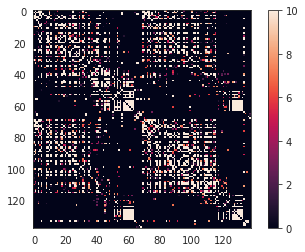

In [89]:
plt.imshow(a_infer)
plt.colorbar()

<matplotlib.colorbar.Colorbar object at 0x7f7fd0f5bee0>

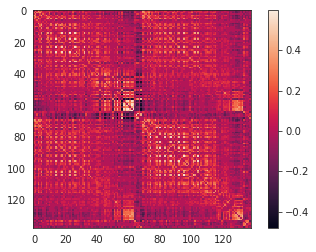

In [90]:
plt.imshow(net.adj)
plt.colorbar()

## Typical (aggregate)

current expt: 'p-1'

[PROGRESS] experiment loaded: 'p29',  total # runs:  988

[PROGRESS] some runs were excluded:     12 x k = 4

[PROGRESS] experiment loaded: 'p28',  total # runs:  985

[PROGRESS] some runs were excluded:     15 x k = 4

[PROGRESS] experiment loaded: 'p27',  total # runs:  988

[PROGRESS] some runs were excluded:     12 x k = 4

[PROGRESS] experiment loaded: 'p26',  total # runs:  986

[PROGRESS] some runs were excluded:     13 x k = 4,  1 x k = 3

[PROGRESS] experiment loaded: 'p25',  total # runs:  994

[PROGRESS] some runs were excluded:     6 x k = 4

[PROGRESS] experiment loaded: 'p24',  total # runs:  993

[PROGRESS] some runs were excluded:     7 x k = 4

[PROGRESS] experiment loaded: 'p23',  total # runs:  993

[PROGRESS] some runs were excluded:     7 x k = 4

[PROGRESS] experiment loaded: 'p22',  total # runs:  992

[PROGRESS] some runs were excluded:     8 x k = 4

[PROGRESS] experiment loaded: 'p21',  total # runs:  992

[PROGRESS] some runs were excluded:     8 x k = 4

[PROGRESS] experiment loaded: 'p20',  total # runs:  1000

[PROGRESS] fit: initiated

[PROGRESS] kmeans fit: done

  0%|          | 0/10 [00:00<?, ?it/s]

[PROGRESS] find best mappings: done

[PROGRESS] results aligned: done

  0%|          | 0/9911 [00:00<?, ?it/s]

[PROGRESS] membership df: done

[PROGRESS] 'result.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)

[PROGRESS] 'perf.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)

[PROGRESS] 'pi_cut.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bo
ld_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)

  0%|          | 0/100 [00:00<?, ?it/s]

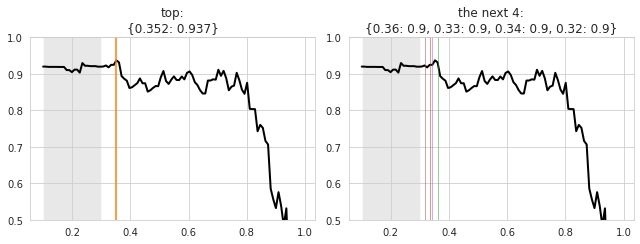

[PROGRESS] process results: done

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)/re
nder/overlap_cortex_k5.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)/re
nder/disjoint_cortex_k5.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)/re
nder/overlap_brain_k5.html

Scene saved at /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/re
sults/SVINET/bold_pearson_task-rest_sub-SLC07_n128/p-1/k5-cosine-linksampling-(2021_08_07)/re
nder/disjoint_brain_k5.html

[PROGRESS] fit: done!

00 - 00:05:18  (dd - hh:mm:ss)

In [4]:
k = 5
p = -1

key = 'sub-SLC07'

start = time()
svinet = SVINET(
    mice=mice,
    num_k=k,
    perc=p,
    key=key,
    mode=mode,
    metric=metric,
    match_metric=match_metric,
    verbose=True,
).load_runs('/home/hadi/Documents/workspaces/svinet_test').fit_svinet()
convert_time(time()-start)

In [5]:
len(svinet._runs)

10

In [9]:
def load_svinet_runs(path: str, num_nodes: int):
    # load community
    with open(pjoin(path, 'communities.txt'), 'r') as f:
        lines = f.readlines()

    community_sv = {}
    for i, line in enumerate(lines):
        x = line.strip('\n').split(' ')
        x = list(filter(None, x))
        community_sv[i] = [int(s) for s in x]

    # load membership
    with open(pjoin(path, 'groups.txt'), 'r') as f:
        lines = f.readlines()

    membership_sv = {}
    for line in lines:
        x = line.strip('\n').split('\t')
        node = int(x[1])
        mem = [float(s) for s in x[2:]]
        membership_sv[node] = np.array(mem)
    _num = len(list(membership_sv.values())[0])
    for node in range(num_nodes):
        if node not in membership_sv:
            membership_sv[node] = np.zeros(_num)
    # noinspection PyTypeChecker
    membership_sv = dict(sorted(membership_sv.items()))

    # get partition (by argmaxing)
    pi = np.concatenate([
        np.reshape(x, (1, -1))
        for x in membership_sv.values()
    ])
    partition_sv = {
        i: comm_idx for i, comm_idx
        in enumerate(np.argmax(pi, axis=1))
    }

    included = []
    for v in community_sv.values():
        included.extend(v)
    num_included = len(set(included))

    results = {
        'community_sv': community_sv,
        'membership_sv': membership_sv,
        'partition_sv': partition_sv,
        'pi': pi.T,
        'num_missing': len(pi) - num_included,
        'num_overlap': len(included) - num_included,
    }
    return results

In [11]:
path = '/home/hadi/Documents/workspaces/svinet/bold_pearson_task-rest_sub-SLC07_ses-1_n128/real/p20/n138-k5-mmsb-seed1-linksampling'
os.listdir(path)

[
    'infer.log',
    'test.txt',
    'validation-edges.txt',
    'groups.txt',
    'param.txt',
    'test-edges.txt',
    'logl.txt',
    'network.dat',
    'communities.txt',
    'validation.txt',
    'max.txt',
    'gamma.txt',
    'lambda.txt'
]

In [40]:
def _edge_sort_fn(e):
    i, j = e
    return j + 1e5 * i

In [45]:
with open(pjoin(path, 'validation-edges.txt'), 'r') as f:
    lines = f.readlines()

valid_edges = collections.defaultdict(list)
for i, line in enumerate(lines):
    x = line.strip('\n').split('\t')
    x = list(filter(None, x))
    if len(x):
        i, j, k = tuple(map(lambda s: int(s), x))
        valid_edges[k].append((i, j))
valid_edges = dict(sorted([(k, sorted(v, key=_edge_sort_fn)) for k,v in valid_edges.items()]))

In [46]:
valid_edges

{
    0: [
        (10, 132),
        (31, 112),
        (78, 64),
        (79, 99),
        (96, 134),
        (113, 65),
        (114, 132)
    ],
    1: [(0, 32), (18, 96), (19, 85), (38, 107), (55, 107), (69, 89), (92, 27)]
}

In [109]:
run = load_svinet_runs(path, 138)

In [110]:
list(run)

[
    'valid',
    'gamma_sv',
    'lambda_sv',
    'community_sv',
    'membership_sv',
    'partition_sv',
    'num_missing',
    'num_overlap',
    'gam',
    'pi'
]

In [111]:
run['gam'].shape

(5, 138)

[<matplotlib.lines.Line2D object at 0x7f7247047850>]

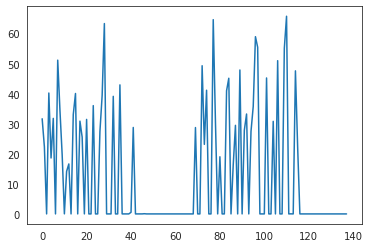

In [115]:
plt.plot(run['gam'][3])

In [116]:
run['gam'].sum(0)

array([69.50001, 69.5    , 69.5    , 69.49999, 69.5    , 69.5    ,
       69.5    , 69.5    , 69.5    , 69.50001, 69.49999, 69.5    ,
       69.5    , 69.5    , 69.50001, 69.5    , 69.5    , 69.50001,
       69.5    , 69.49999, 69.5    , 69.5    , 69.5    , 69.50001,
       69.5    , 69.49999, 69.5    , 69.49999, 69.5    , 69.49999,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.50001,
       69.5    , 69.5    , 69.49999, 69.5    , 69.5    , 69.5    ,
       69.5    , 69.50001, 69.5    , 69.5    , 69.5    , 69.49999,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ,
       69.5    , 69.50001, 69.5    , 69.5    , 69.5    , 69.5    ,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ,
       69.5    , 69.5    , 69.5    , 69.49999, 69.50001, 69.5    ,
       69.50001, 69.50001, 69.5    , 69.5    , 69.5    , 69.49999,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.49999,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ,
       69.5    , 69.50001, 69.50001, 69.5    , 69.50001, 69.50001,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ,
       69.5    , 69.50001, 69.5    , 69.49999, 69.49999, 69.5    ,
       69.49999, 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ,
       69.49999, 69.5    , 69.5    , 69.50001, 69.50001, 69.5    ,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.49999,
       69.5    , 69.5    , 69.5    , 69.5    , 69.5    , 69.5    ])

In [117]:


run['pi'].sum(0)

array([1.   , 1.001, 1.   , 1.   , 1.001, 1.   , 1.   , 1.001, 1.001,
       1.001, 1.   , 1.001, 1.   , 1.   , 1.   , 1.001, 1.   , 1.   ,
       1.001, 1.001, 1.   , 1.   , 1.   , 1.001, 1.   , 1.001, 1.001,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.001, 1.001,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.001, 1.   , 1.001, 1.   ,
       1.   , 1.001, 1.   , 1.   , 1.   , 1.   , 1.001, 1.   , 1.   ,
       1.   , 1.001, 1.   , 1.   , 1.   , 1.   , 1.001, 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.001, 1.   ,
       1.   , 1.001, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.001,
       1.   , 1.   , 1.001, 1.   , 1.   , 1.001, 1.001, 1.   , 1.001,
       1.   , 1.001, 1.001, 1.   , 1.   , 1.001, 1.001, 1.   , 1.   ,
       1.   , 1.   , 1.001, 1.   , 1.   , 1.001, 1.   , 1.   , 1.   ,
       1.   , 1.001, 1.   , 1.   , 0.999, 1.   , 1.001, 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.001, 1.   , 1.   , 1.   , 1.   , 1.001, 1.   , 1.001, 1.   ,
       1.001, 1.   , 1.   ])

[<matplotlib.lines.Line2D object at 0x7f7244a9c040>]

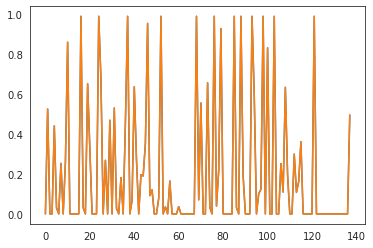

In [127]:
gamma_saved = run['gam'].copy()
gamma_saved /= gamma_saved.sum(0, keepdims=True)

plt.plot(run['pi'][2])
plt.plot(gamma_saved[2])

In [128]:
list(run)

[
    'valid',
    'gamma_sv',
    'lambda_sv',
    'community_sv',
    'membership_sv',
    'partition_sv',
    'num_missing',
    'num_overlap',
    'gam',
    'pi'
]

In [134]:
svinet.n2l[0]

NameError: name 'svinet' is not defined

In [132]:
run['gamma_sv']

{
    0: array([ 0.2001 ,  0.20022,  0.20526, 31.76391, 37.13052]),
    1: array([10.12097,  0.20057, 36.5353 , 22.43894,  0.20422]),
    2: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    3: array([ 0.20004,  0.20004,  0.20067, 40.30096, 28.59828]),
    4: array([ 0.20023, 17.48226, 30.70018, 18.75205,  2.36528]),
    5: array([ 0.20001,  0.20019,  2.28675, 31.88995, 34.9231 ]),
    6: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    7: array([ 0.2    ,  0.2    , 17.69319, 51.2036 ,  0.20321]),
    8: array([ 0.20001,  0.2    ,  0.2002 , 34.59633, 34.30346]),
    9: array([ 0.20015,  0.20133, 18.11204, 19.84332, 31.14317]),
    10: array([ 9.15119,  0.20079, 59.72692,  0.21712,  0.20397]),
    11: array([ 0.2    ,  0.2    ,  0.20033, 14.30702, 54.59265]),
    12: array([ 0.2    ,  0.20096,  0.20328, 16.77549, 52.12027]),
    13: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    14: array([ 0.20001,  0.20021,  0.20092, 33.1787 , 35.72017]),
    15: array([ 0.20001,  0.2    ,  0.20056, 40.14625, 28.75318]),
    16: array([ 0.2,  0.2, 68.7,  0.2,  0.2]),
    17: array([ 0.20001,  0.20019,  2.32469, 30.97699, 35.79813]),
    18: array([ 0.20001,  0.2    ,  0.20051, 25.68116, 43.21832]),
    19: array([ 0.20037, 23.607  , 45.28849,  0.20298,  0.20115]),
    20: array([ 0.20008,  0.20207, 22.36624, 31.55087, 15.18074]),
    21: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    22: array([ 0.2    ,  0.2    ,  0.2    ,  0.20001, 68.69999]),
    23: array([ 0.20001,  0.20016,  0.20069, 36.1236 , 32.77555]),
    24: array([ 0.2,  0.2, 68.7,  0.2,  0.2]),
    25: array([ 0.2003 , 22.22184, 46.67367,  0.20314,  0.20104]),
    26: array([ 0.20001,  0.2    ,  0.20053, 27.56599, 41.33347]),
    27: array([ 0.20042,  0.20942, 18.78039, 39.53111, 10.77865]),
    28: array([ 0.20001,  0.2    ,  0.20057, 63.34437,  5.55505]),
    29: array([ 0.20016, 36.21683, 32.67916,  0.20244,  0.2014 ]),
    30: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    31: array([ 3.77291, 28.42984, 36.89599,  0.20093,  0.20033]),
    32: array([ 0.20004,  0.20256,  2.11736, 39.20238, 27.77766]),
    33: array([ 0.2,  0.2,  0.2,  0.2, 68.7]),
    34: array([ 0.20027, 56.14627, 12.75346,  0.2    ,  0.2    ]),
    35: array([ 0.20004,  0.20013,  0.20067, 43.00315, 25.89602]),
    36: array([37.07727,  0.31326, 31.70844,  0.20103,  0.2    ]),
    37: array([ 0.2,  0.2, 68.7,  0.2,  0.2]),
    38: array([ 2.79605, 66.08087,  0.22307,  0.2    ,  0.2    ]),
    39: array([ 0.20016, 64.07265,  4.82688,  0.20031,  0.2    ]),
    40: array([ 0.20032, 24.07173, 44.27935,  0.73747,  0.21113]),
    41: array([ 0.20027, 21.30835, 18.90667, 28.8802 ,  0.20451]),
    42: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    43: array([ 0.2001 , 55.16212, 13.73433,  0.20275,  0.20071]),
    44: array([ 8.3263 , 47.41023, 13.36347,  0.2    ,  0.2    ]),
    45: array([ 0.20055, 44.27655, 24.61734,  0.20438,  0.20118]),
    46: array([ 2.63026,  0.20178, 66.20175,  0.26621,  0.2    ]),
    47: array([ 0.21201, 62.32908,  6.55846,  0.20042,  0.20002]),
    48: array([ 0.20017, 60.32043,  8.57439,  0.20396,  0.20105]),
    49: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    50: array([68.7,  0.2,  0.2,  0.2,  0.2]),
    51: array([ 0.20043, 63.29458,  5.60455,  0.20042,  0.20002]),
    52: array([ 0.2,  0.2, 68.7,  0.2,  0.2]),
    53: array([ 0.2    , 68.69999,  0.20001,  0.2    ,  0.2    ]),
    54: array([ 0.202  , 66.26229,  2.63571,  0.2    ,  0.2    ]),
    55: array([ 2.40549, 66.49142,  0.20113,  0.2002 ,  0.20177]),
    56: array([57.24658,  0.23151, 11.62033,  0.2    ,  0.20158]),
    57: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    58: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    59: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    60: array([ 2.55379, 63.85879,  2.68719,  0.20021,  0.20002]),
    61: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    62: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    63: array([ 0.2, 68.7,  0.2,  0.2,  0.2]),
    64: array([ 0.2    ,  0.2    ,  0.2    ,  0.20001, 68.69999]),
    65: array([ 0.2, 68.7,  0.2, 

In [131]:
run['community_sv']

{
    0: [
        2,
        6,
        13,
        21,
        30,
        36,
        38,
        42,
        44,
        50,
        55,
        56,
        66,
        67,
        71,
        75,
        82,
        90,
        99,
        107,
        108,
        111,
        112,
        113,
        116,
        117,
        118,
        120,
        122,
        123,
        125,
        126,
        128,
        129,
        135,
        137
    ],
    1: [
        4,
        19,
        25,
        29,
        31,
        34,
        38,
        39,
        40,
        41,
        43,
        44,
        45,
        47,
        48,
        49,
        51,
        53,
        54,
        55,
        57,
        58,
        59,
        60,
        61,
        62,
        63,
        65,
        107,
        113,
        116,
        118,
        120,
        123,
        124,
        125,
        126,
        127,
        128,
        129,
        131,
        134
    ],
    2: [
        1,
        4,
        9,
        10,
        16,
        19,
        20,
        24,
        25,
        27,
        29,
        31,
        32,
        36,
        40,
        41,
        43,
        44,
        45,
        46,
        47,
        48,
        52,
        69,
        70,
        73,
        77,
        78,
        79,
        85,
        88,
        89,
        93,
        94,
        96,
        98,
        100,
        106,
        107,
        108,
        109,
        112,
        114,
        115,
        121
    ],
    3: [
        0,
        1,
        3,
        4,
        5,
        7,
        8,
        9,
        11,
        12,
        14,
        15,
        17,
        18,
        20,
        23,
        26,
        27,
        28,
        32,
        35,
        41,
        69,
        72,
        73,
        74,
        77,
        78,
        80,
        83,
        84,
        86,
        87,
        89,
        91,
        92,
        94,
        95,
        96,
        97,
        101,
        104,
        106,
        109,
        110,
        114,
        115
    ],
    4: [
        0,
        3,
        5,
        8,
        9,
        11,
        12,
        14,
        15,
        17,
        18,
        20,
        22,
        23,
        26,
        27,
        32,
        33,
        35,
        64,
        69,
        72,
        74,
        78,
        80,
        81,
        83,
        84,
        86,
        87,
        91,
        92,
        95,
        101,
        102,
        104,
        111,
        133,
        135
    ]
}

In [108]:
def _load_sv_validedges(lines: List[str]):
	valid_edges = collections.defaultdict(list)
	for i, line in enumerate(lines):
		x = line.strip('\n').split('\t')
		x = list(filter(None, x))
		if len(x):
			i, j, k = tuple(map(lambda s: int(s), x))
			valid_edges[k].append((i, j))

	def _edge_sort_fn(e):
		n, m = e
		return m + 1e5 * n
	valid_edges = dict(sorted([
		(k, sorted(v, key=_edge_sort_fn))
		for k, v in valid_edges.items()
	]))
	return valid_edges


def _load_sv_valid(lines: List[str]):
	_vld = collections.defaultdict(dict)
	for i, line in enumerate(lines):
		x = line.strip('\n').split('\t')
		x = list(filter(None, x))
		if len(x):
			_vld[int(x[0])] = {
				'll': float(x[2]),
				'n': int(x[3]),
				'll_link': float(x[4]),
				'n_link': int(x[5]),
				'll_nonlink': float(x[6]),
				'n_nonlink': int(x[7]),
				'll_sparse_link': float(x[8]),
				'll_sparse_nonlink': float(x[9]),
				'll_sparse': float(x[10]),
			}
	_vld = dict(sorted(_vld.items()))
	valid = {
		'n': np.unique([v['n'] for v in _vld.values()]).item(),
		'n_link': np.unique([v['n_link'] for v in _vld.values()]).item(),
		'n_nonlink': np.unique([v['n_nonlink'] for v in _vld.values()]).item(),
		'll': [v['ll'] for v in _vld.values()],
		'll_link': [v['ll_link'] for v in _vld.values()],
		'll_nonlink': [v['ll_nonlink'] for v in _vld.values()],
		'll_sparse': [v['ll_sparse'] for v in _vld.values()],
		'll_sparse_link': [v['ll_sparse_link'] for v in _vld.values()],
		'll_sparse_nonlink': [v['ll_sparse_nonlink'] for v in _vld.values()],
	}
	return valid


def _load_sv_lambda(lines: List[str]):
	lambda_sv = {}
	for line in lines:
		x = line.strip('\n').split('\t')
		x = list(filter(None, x))
		if len(x):
			lambda_sv[int(x[0])] = tuple(float(s) for s in x[1:])
	return lambda_sv


def _load_sv_community(lines: List[str]):
	community_sv = {}
	for i, line in enumerate(lines):
		x = line.strip('\n').split(' ')
		x = list(filter(None, x))
		community_sv[i] = [int(s) for s in x]
	return community_sv


def _load_sv_membership(lines: List[str], num_nodes: int):
	membership_sv = {}
	for line in lines:
		x = line.strip('\n').split('\t')
		node = int(x[1])
		mem = [float(s) for s in x[2:]]
		membership_sv[node] = np.array(mem)
	_num = len(list(membership_sv.values())[0])
	for node in range(num_nodes):
		if node not in membership_sv:
			membership_sv[node] = np.zeros(_num)
	# noinspection PyTypeChecker
	membership_sv = dict(sorted(membership_sv.items()))
	return membership_sv


def load_svinet_runs(path: str, num_nodes: int):
	# validation data
	with open(pjoin(path, 'validation.txt'), 'r') as f:
		lines = f.readlines()
	valid = _load_sv_valid(lines)
	with open(pjoin(path, 'validation-edges.txt'), 'r') as f:
		lines = f.readlines()
	valid = {'edges': _load_sv_validedges(lines), **valid}

	# fitted parameters
	with open(pjoin(path, 'communities.txt'), 'r') as f:
		lines = f.readlines()
	community_sv = _load_sv_community(lines)
	with open(pjoin(path, 'groups.txt'), 'r') as f:
		lines = f.readlines()
	membership_sv = _load_sv_membership(lines, num_nodes)
	with open(pjoin(path, 'gamma.txt'), 'r') as f:
		lines = f.readlines()
	gamma_sv = _load_sv_membership(lines, num_nodes)
	with open(pjoin(path, 'lambda.txt'), 'r') as f:
		lines = f.readlines()
	lambda_sv = _load_sv_lambda(lines)

	# gamma, pi, and partition
	gam = np.concatenate([
		np.reshape(x, (1, -1))
		for x in gamma_sv.values()
	])
	pi = np.concatenate([
		np.reshape(x, (1, -1))
		for x in membership_sv.values()
	])
	partition_sv = {
		i: comm_idx for i, comm_idx
		in enumerate(np.argmax(pi, axis=1))
	}

	included = []
	for v in community_sv.values():
		included.extend(v)
	n_included = len(set(included))

	results = {
		'valid': valid,
		'gamma_sv': gamma_sv,
		'lambda_sv': lambda_sv,
		'community_sv': community_sv,
		'membership_sv': membership_sv,
		'partition_sv': partition_sv,
		'num_missing': len(pi) - n_included,
		'num_overlap': len(included) - n_included,
		'gam': gam.T,
		'pi': pi.T,
	}
	return results